## Credit Risk Scoring Dataset

### Domain - Banking
### Dataset - Click here to download the dataset: https://drive.google.com/file/d/1pFQv3ejF-ebhwJ7vUyxh5QtsDpemq0ln/view?usp=sharing


### Detailed data description of Credit Risk dataset:
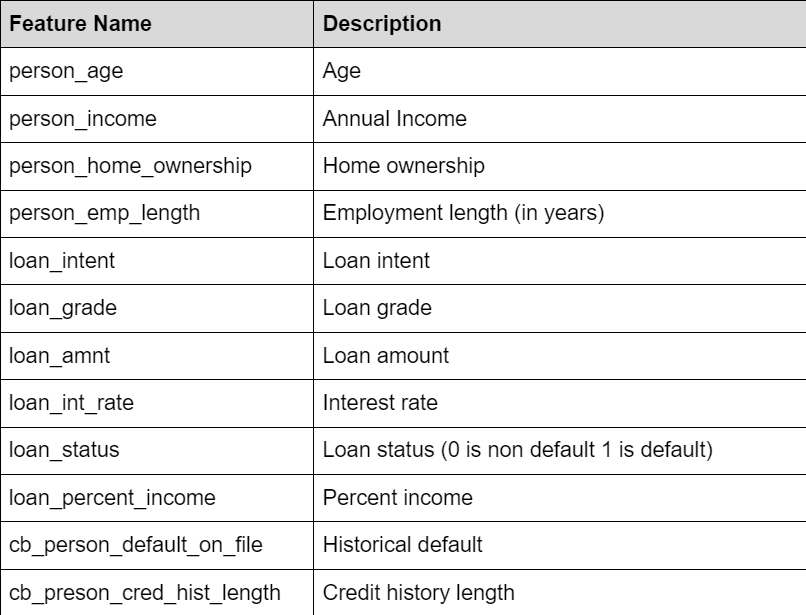




### Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


## Problem statement:
- Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.


### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step - 1: Load the data

In [2]:
credit=pd.read_csv(r'C:\Users\Irfan\Downloads\credit_risk_dataset.csv')
credit.drop(credit.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Basic Exploration

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


### Missing values :
- if outliers values are present in the data then we fill that variable by using median
- if outliers are not in the then we fill the null values with mean

In [6]:
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
num=credit.select_dtypes(include='number')
cat=credit.select_dtypes(exclude='number')
num=num.columns.drop('loan_status')

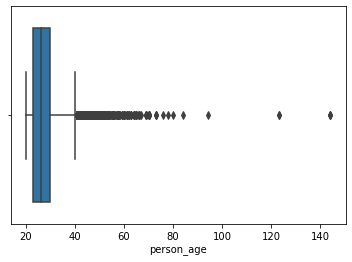

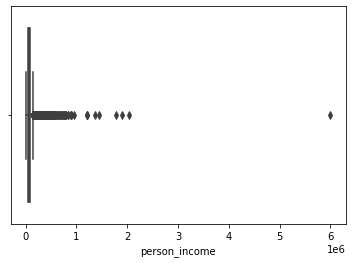

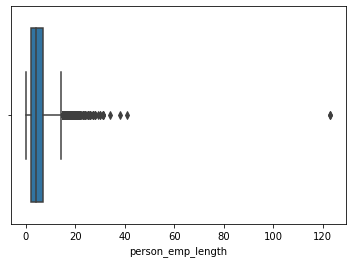

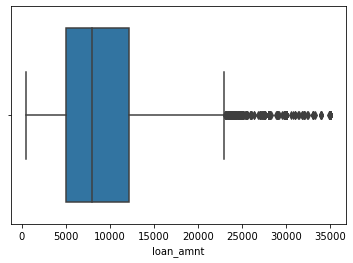

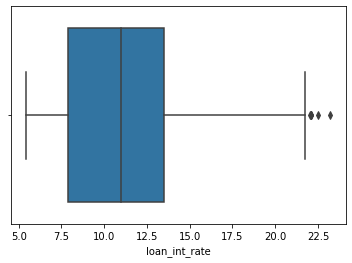

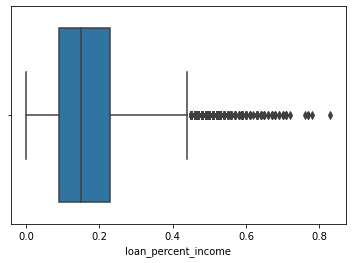

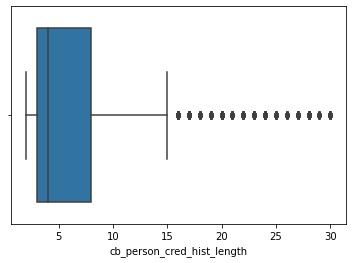

In [8]:
for i in num:
    sns.boxplot(credit[i])
    plt.show()

In [9]:
credit['person_emp_length']=credit['person_emp_length'].fillna(credit['person_emp_length'].median())

In [10]:
credit['loan_int_rate']=credit['loan_int_rate'].fillna(credit['loan_int_rate'].median())

In [11]:
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Outliers detection

In [12]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>100)].index
    return outliers
credit.drop(out('person_age'),inplace=True)

In [13]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>50000000)].index
    return outliers
credit.drop(out('person_income'),inplace=True)

In [14]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>100)].index
    return outliers
credit.drop(out('person_emp_length'),inplace=True)

In [15]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>30000)].index
    return outliers
credit.drop(out('loan_amnt'),inplace=True)

In [16]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>ub)].index
    return outliers
credit.drop(out('loan_int_rate'),inplace=True)

In [17]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>ub)].index
    return outliers
credit.drop(out('loan_percent_income'),inplace=True)

In [18]:
def out(col):
    q1 = credit[col].quantile(0.25)
    q3 = credit[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = credit[(credit[col]<lb)|(credit[col]>ub)].index
    return outliers
credit.drop(out('cb_person_cred_hist_length'),inplace=True)

### Removing_duplicates

In [19]:

credit.drop_duplicates(inplace=True)

In [20]:
credit=credit[['person_age','person_home_ownership','person_emp_length','person_income','loan_intent','loan_grade','loan_amnt',
              'loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length','loan_status']]

In [21]:
import os
os.getcwd()
credit.to_csv('C:\\Users\\Irfan\\Machine Learning\\credit.csv')

In [22]:
credit=pd.read_csv("credit.csv")
credit.drop(credit.filter(regex="Unnamed"),axis=1, inplace=True)
credit

,person_age,person_home_ownership,person_emp_length,person_income,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,21,OWN,5.0,9600,EDUCATION,B,1000,11.14,0.10,N,2,0
1,21,OWN,2.0,9900,VENTURE,A,2500,7.14,0.25,N,2,1
2,21,OWN,6.0,10000,VENTURE,D,1600,14.74,0.16,N,3,1
3,23,MORTGAGE,7.0,500000,DEBTCONSOLIDATION,B,30000,10.65,0.06,N,3,0
4,24,MORTGAGE,8.0,10800,EDUCATION,B,1750,10.99,0.16,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30397,37,MORTGAGE,11.0,90000,DEBTCONSOLIDATION,A,4000,6.62,0.04,N,15,0
30398,38,MORTGAGE,0.0,200000,DEBTCONSOLIDATION,A,3000,7.68,0.01,N,12,0
30399,38,MORTGAGE,5.0,110000,MEDICAL,B,16000,11.99,0.15,N,13,0
30400,36,MORTGAGE,18.0,92000,DEBTCONSOLIDATION,A,4000,7.29,0.04,N,13,0


### Step - 2: Document the below mentioned points properly:
- Inputvariables:person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,
  loan_percent_income,cb_person_default_on_file,b_person_cred_hist_length
- Target variable:loan_status
- Type:Supervised Learning(since target variable is given).
- Task:classification
- Identify the Evaluation Metric.
- classification task: Accuracy

In [23]:
X=credit[['person_age','person_home_ownership','person_emp_length','person_income','loan_intent','loan_grade','loan_amnt','loan_int_rate', 
          'loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y=credit['loan_status']

In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30402 entries, 0 to 30401
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  30402 non-null  int64  
 1   person_home_ownership       30402 non-null  object 
 2   person_emp_length           30402 non-null  float64
 3   person_income               30402 non-null  int64  
 4   loan_intent                 30402 non-null  object 
 5   loan_grade                  30402 non-null  object 
 6   loan_amnt                   30402 non-null  int64  
 7   loan_int_rate               30402 non-null  float64
 8   loan_percent_income         30402 non-null  float64
 9   cb_person_default_on_file   30402 non-null  object 
 10  cb_person_cred_hist_length  30402 non-null  int64  
 11  loan_status                 30402 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(22801, 11) (22801,)
(7601, 11) (7601,)


In [26]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include='object')
X_train_cat_nominal=X_train_cat.drop('loan_grade',axis=1)
X_train_cat_ordinal=X_train_cat.drop(['person_home_ownership','loan_intent','cb_person_default_on_file'],axis=1)

## Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [27]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled

,person_age,person_emp_length,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
18916,0.749729,-0.444042,-0.704021,-1.045110,-0.122368,-0.660286,1.124068
22423,0.556553,0.330129,-0.114237,0.971632,1.427840,0.918101,1.124068
19359,1.522436,-1.218213,-0.928361,-0.892583,0.051702,0.391972,1.430759
25023,1.136082,0.072072,0.493620,2.157951,0.022143,0.812875,-0.102697
4056,-0.795683,0.588185,-0.073713,-0.807846,0.478666,-0.975963,-1.022770
...,...,...,...,...,...,...,...
13123,-0.988860,-0.702099,-1.038181,-1.146794,0.009006,0.076295,-1.022770
19648,1.522436,0.846242,-0.539738,-0.807846,-1.426250,-0.449834,0.203995
9845,-0.795683,-0.960156,-0.012928,0.971632,1.161809,0.707649,-0.409388
10799,-0.795683,-0.444042,-0.193259,-0.612951,0.009006,-0.765512,-0.716079


In [28]:
credit['person_home_ownership'].value_counts()

RENT        15316
MORTGAGE    12604
OWN          2382
OTHER         100
Name: person_home_ownership, dtype: int64

In [29]:
credit['loan_intent'].value_counts()

EDUCATION            6111
MEDICAL              5665
VENTURE              5348
PERSONAL             5067
DEBTCONSOLIDATION    4870
HOMEIMPROVEMENT      3341
Name: loan_intent, dtype: int64

In [30]:
credit['cb_person_default_on_file'].value_counts()

N    25076
Y     5326
Name: cb_person_default_on_file, dtype: int64

In [31]:
credit['loan_grade'].value_counts()

A    10134
B     9750
C     6057
D     3375
E      871
F      187
G       28
Name: loan_grade, dtype: int64

In [32]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat_nominal), 
                               columns=encoder_.get_feature_names(X_train_cat_nominal.columns), 
                               index = X_train_cat_nominal.index)

X_train_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
18916,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
22423,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19359,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4056,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
13123,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19648,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10799,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Label encoading

In [33]:
X_train_cat_le=pd.DataFrame(index=X_train_cat_nominal.index)
X_train_cat_le

""
18916
22423
19359
25023
4056
...
13123
19648
9845
10799


In [34]:
le_coader={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_train_cat_le['loan_grade']=X_train_cat_ordinal['loan_grade'].apply(lambda x:le_coader[x])
X_train_cat_le

,loan_grade
18916,6
22423,4
19359,6
25023,5
4056,6
...,...
13123,3
19648,7
9845,3
10799,6


### concat train_data

In [35]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe,X_train_cat_le], axis=1)

X_train_transformed

,person_age,person_emp_length,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
18916,0.749729,-0.444042,-0.704021,-1.045110,-0.122368,-0.660286,1.124068,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
22423,0.556553,0.330129,-0.114237,0.971632,1.427840,0.918101,1.124068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
19359,1.522436,-1.218213,-0.928361,-0.892583,0.051702,0.391972,1.430759,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
25023,1.136082,0.072072,0.493620,2.157951,0.022143,0.812875,-0.102697,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
4056,-0.795683,0.588185,-0.073713,-0.807846,0.478666,-0.975963,-1.022770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-0.988860,-0.702099,-1.038181,-1.146794,0.009006,0.076295,-1.022770,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3
19648,1.522436,0.846242,-0.539738,-0.807846,-1.426250,-0.449834,0.203995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
9845,-0.795683,-0.960156,-0.012928,0.971632,1.161809,0.707649,-0.409388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
10799,-0.795683,-0.444042,-0.193259,-0.612951,0.009006,-0.765512,-0.716079,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


## Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely

In [36]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_cat=X_test.select_dtypes(include='object')
X_test_cat_nominal=X_test_cat.drop('loan_grade',axis=1)
X_test_cat_ordinal=X_test_cat.drop(['person_home_ownership','loan_intent','cb_person_default_on_file'],axis=1)

In [37]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled

,person_age,person_emp_length,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22516,0.556553,-0.185985,-0.093975,-0.807846,-1.452525,-0.975963,0.203995
8953,-0.795683,0.588185,-0.865063,-0.723109,0.048418,0.602424,-0.716079
20881,0.363376,-0.702099,-0.519476,-0.553635,0.058271,-0.134157,0.203995
18721,0.363376,-0.444042,-0.576209,-1.062057,2.735007,-0.870738,-0.102697
21761,0.170200,-0.185985,-0.073713,-0.350266,0.665873,-0.449834,1.124068
...,...,...,...,...,...,...,...
20531,-0.022977,-0.960156,-0.235809,-0.655319,1.086269,-0.660286,0.203995
8346,-0.409330,-0.960156,-0.125665,-0.299424,-1.380270,-0.344609,-0.716079
2017,-0.216153,-1.218213,2.418503,0.717421,-1.633164,-0.975963,-0.716079
26854,0.556553,0.072072,2.317193,0.802158,-1.620026,-0.870738,1.124068


In [38]:
X_test_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_test_cat_nominal), 
                               columns=encoder_.get_feature_names(X_test_cat_nominal.columns), 
                               index = X_test_cat_nominal.index)

X_test_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
22516,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8953,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
20881,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18721,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21761,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
20531,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
26854,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Label Encoading

In [39]:
X_test_cat_le=pd.DataFrame(index=X_test_cat_ordinal.index)
X_test_cat_le

""
22516
8953
20881
18721
21761
...
20531
8346
2017
26854


In [40]:
le_coader={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_test_cat_le['loan_grade']=X_test_cat_ordinal['loan_grade'].apply(lambda x:le_coader[x])
X_test_cat_le

,loan_grade
22516,7
8953,6
20881,6
18721,3
21761,5
...,...
20531,5
8346,7
2017,7
26854,7


## concat test data

In [41]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe,X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_emp_length,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
22516,0.556553,-0.185985,-0.093975,-0.807846,-1.452525,-0.975963,0.203995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
8953,-0.795683,0.588185,-0.865063,-0.723109,0.048418,0.602424,-0.716079,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
20881,0.363376,-0.702099,-0.519476,-0.553635,0.058271,-0.134157,0.203995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
18721,0.363376,-0.444042,-0.576209,-1.062057,2.735007,-0.870738,-0.102697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
21761,0.170200,-0.185985,-0.073713,-0.350266,0.665873,-0.449834,1.124068,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Logestic Regression
- KNN classificaton
- Support Vector classification
- Decision Tree classification
- Naive Bayes classification
- Random Forest
- ADA boost classification
- Gbdt classification
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric.
### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved.
- Write your conclusion on the best algorithm for the Medical Cost Prediction problem.

## Training Logestic Regression

In [42]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
Confusion_matrix=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

In [43]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8551506380739377


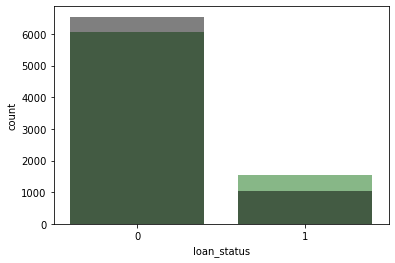

In [44]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

### Training KNN classification:

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classification=KNeighborsClassifier()
KNN_classification.fit(X_train_transformed,y_train)
y_test_pred=KNN_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8881726088672544


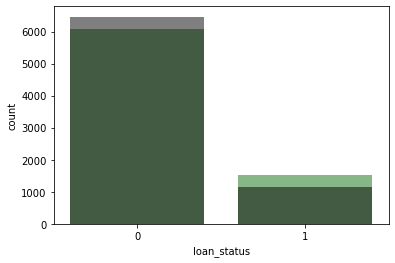

In [46]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()


## Training-Support vector classification

In [47]:
from sklearn.svm import SVC
SV_classification=SVC()
SV_classification.fit(X_train_transformed,y_train)
y_test_pred=SV_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Support Vector Classifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8954084988817261


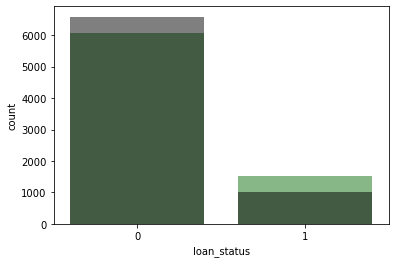

In [48]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

## Training-Decision Tree classification

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT_classification=DecisionTreeClassifier()
DT_classification.fit(X_train_transformed,y_train)
y_test_pred=DT_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8892251019602684


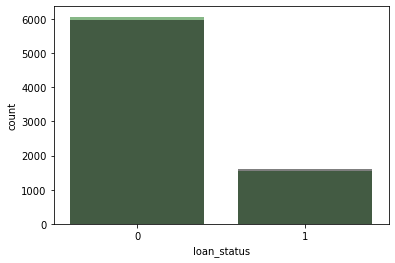

In [50]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

## Training-Naive Bayes classification

In [51]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train_transformed,y_train)
y_test_pred=NB.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GaussianNB")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8069990790685436


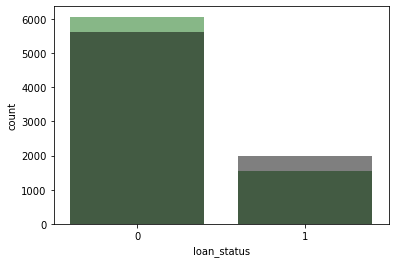

In [52]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

## Ensemble
### Training-Random Forest classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
Random_classification=RandomForestClassifier()
Random_classification.fit(X_train_transformed,y_train)
y_test_pred=Random_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.9355347980528878


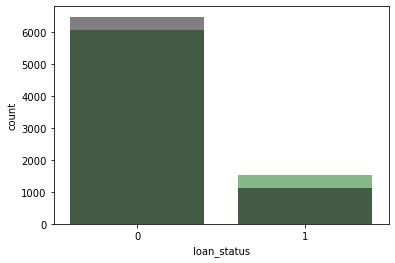

In [54]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

## Training-Adaboost Classification

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ADA_classification=AdaBoostClassifier()
ADA_classification.fit(X_train_transformed,y_train)
y_test_pred=ADA_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.8860676226812262


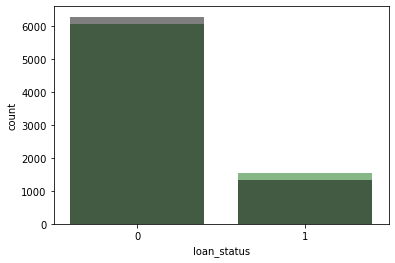

In [56]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

## Training-Gradiant boost decision tree classification

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT_classification=GradientBoostingClassifier()
GBDT_classification.fit(X_train_transformed,y_train)
y_test_pred=GBDT_classification.predict(X_test_transformed)
from sklearn import metrics
a=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(a)
Precision_score.append(metrics.precision_score(y_test,y_test_pred))
Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred))
F1_score.append(metrics.f1_score(y_test,y_test_pred))
Roc_Auc_Score.append(metrics.roc_auc_score(y_test,y_test_pred))
Log_Los.append(metrics.log_loss(y_test,y_test_pred))
print(a)

0.925009867122747


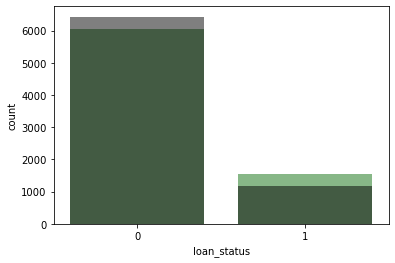

In [58]:
sns.countplot(x=y_test,alpha=0.5,color='green')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [59]:
overview=pd.DataFrame({"Accuracy_score":Accuracy_score,"Precision_score":Precision_score,
                      "F1_score":F1_score,"Roc_Auc_Score":Roc_Auc_Score},index=Algorithm)


In [60]:
overview

,Accuracy_score,Precision_score,F1_score,Roc_Auc_Score
LogisticRegression,0.855151,0.705882,0.574739,0.716793
KNeighborsClassifier,0.888173,0.800702,0.682124,0.778358
Support Vector Classifier,0.895408,0.864173,0.688358,0.774619
DecisionTreeClassifier,0.889225,0.714551,0.732698,0.837897
GaussianNB,0.806999,0.517172,0.582646,0.754751
RandomForestClassifier,0.935535,0.965272,0.815651,0.849880
AdaBoostClassifier,0.886068,0.753986,0.696353,0.796747
GradientBoostingClassifier,0.925010,0.912041,0.789357,0.839393


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


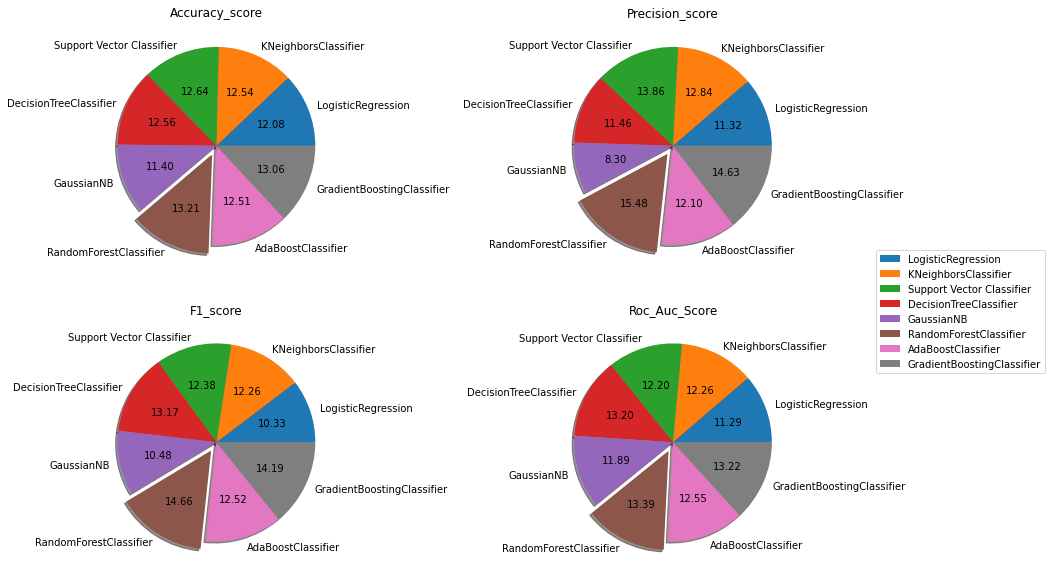

In [61]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
overview['Accuracy_score'].plot(ax=axes[0,0],kind='pie',subplots=True,explode=[0,0,0,0,0,0.1,0,0],ylabel=' ',autopct='%.2f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[0,0].title.set_text('Accuracy_score')
overview['Precision_score'].plot(ax=axes[0,1],kind='pie',subplots=True,explode=[0,0,0,0,0,0.1,0,0],ylabel=' ',autopct='%.2f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[0,1].title.set_text('Precision_score')
overview['F1_score'].plot(ax=axes[1,0],kind='pie',subplots=True,explode=[0,0,0,0,0,0.1,0,0],ylabel=' ',autopct='%.2f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[1,0].title.set_text('F1_score')
overview['Roc_Auc_Score'].plot(ax=axes[1,1],kind='pie',subplots=True,explode=[0,0,0,0,0,0.1,0,0],ylabel=' ',autopct='%.2f',shadow=True)
plt.legend(bbox_to_anchor=(1.3,1.3));
axes[1,1].title.set_text('Roc_Auc_Score')
plt.show()

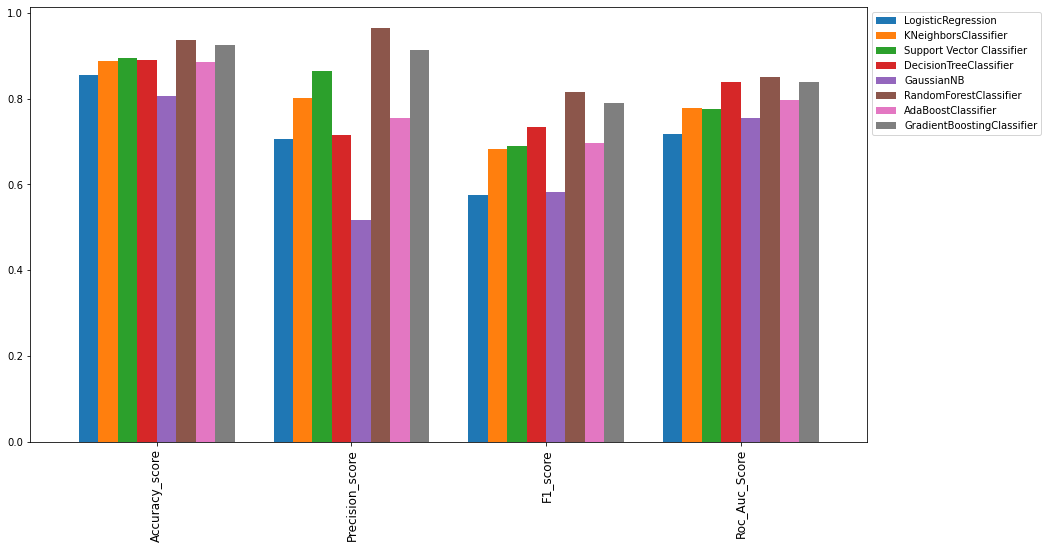

In [62]:
fig,axes=plt.subplots(figsize=(15,8))
overview.T.plot(ax=axes,kind='bar',width=0.8,align='center',alpha=1.0)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize=12);

## $\color{darkblue}{\text{Conclusion:}}$
### Using Evalution matrix(Accuracy_Score,Precission_Score,F1_score,Roc_Auc_Score)
- Random Forest Classification algorithm is the best model for Credit Risk Scoring.
- Becuase Random Forest Classification Acuuracy_score is more compare to other models.


## SPRINT 2 - Exploratory Data Analysis

In [63]:
credit=pd.read_csv("credit.csv")
credit.drop(credit.filter(regex="Unnamed"),axis=1, inplace=True)
credit

,person_age,person_home_ownership,person_emp_length,person_income,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,21,OWN,5.0,9600,EDUCATION,B,1000,11.14,0.10,N,2,0
1,21,OWN,2.0,9900,VENTURE,A,2500,7.14,0.25,N,2,1
2,21,OWN,6.0,10000,VENTURE,D,1600,14.74,0.16,N,3,1
3,23,MORTGAGE,7.0,500000,DEBTCONSOLIDATION,B,30000,10.65,0.06,N,3,0
4,24,MORTGAGE,8.0,10800,EDUCATION,B,1750,10.99,0.16,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30397,37,MORTGAGE,11.0,90000,DEBTCONSOLIDATION,A,4000,6.62,0.04,N,15,0
30398,38,MORTGAGE,0.0,200000,DEBTCONSOLIDATION,A,3000,7.68,0.01,N,12,0
30399,38,MORTGAGE,5.0,110000,MEDICAL,B,16000,11.99,0.15,N,13,0
30400,36,MORTGAGE,18.0,92000,DEBTCONSOLIDATION,A,4000,7.29,0.04,N,13,0


### Univariate Analysis

In [64]:
num

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

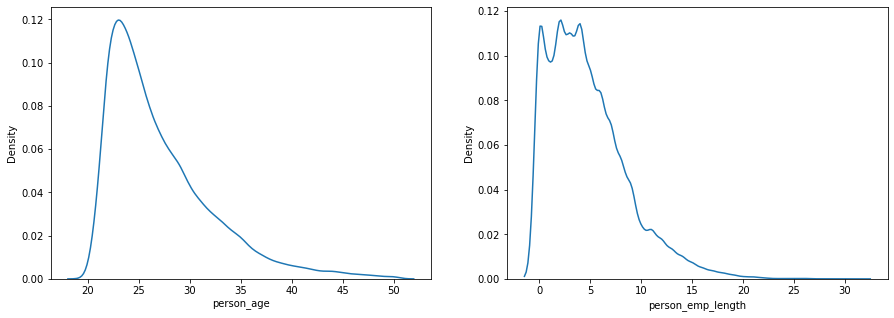

In [65]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=credit['person_age'],data=credit,ax=axes[0])
sns.kdeplot(x=credit['person_emp_length'],data=credit,ax=axes[1])
plt.show()

## Observation:
- The maximum density of the person age range is 20-30.
- The person_emp_length have most density range is 5-10.

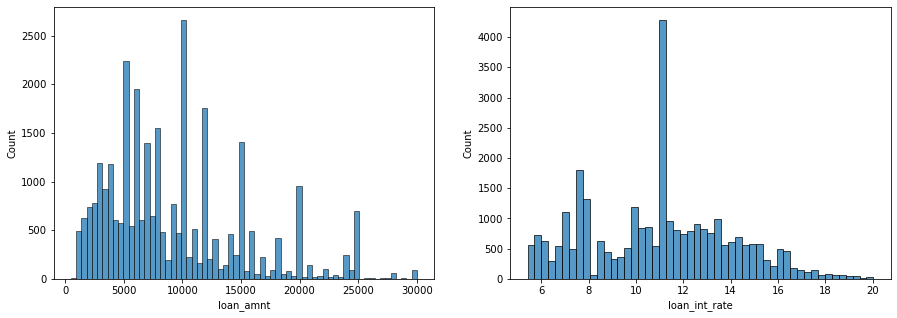

In [66]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.histplot(x=credit['loan_amnt'],data=credit,ax=axes[0])
sns.histplot(x=credit['loan_int_rate'],data=credit,ax=axes[1])
plt.show()

# Observation:
- The maximum loan amount lies between in the range 5000-150000.
-  The maximum loan amount interest rate lies between in the range 7.5-12.5.

In [67]:
cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


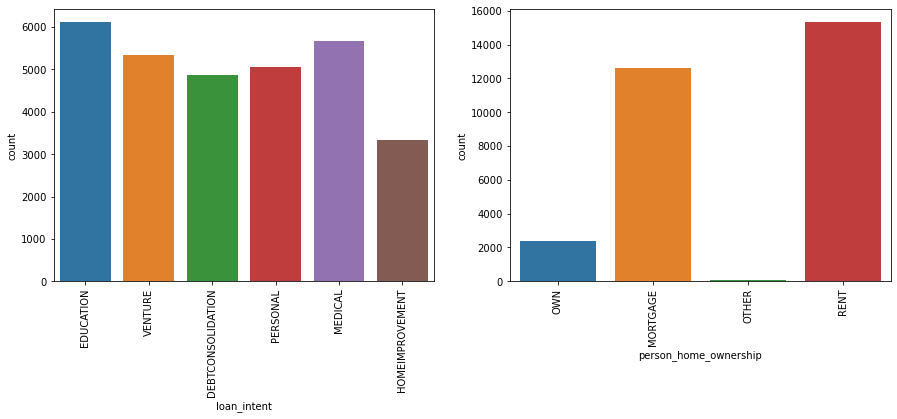

In [68]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=credit['loan_intent'],data=credit,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=credit['person_home_ownership'],data=credit,ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Obsevation:
- In loan_intent the Education loan_intent has most count.
- In person_home_ownership The RENT house count is high.

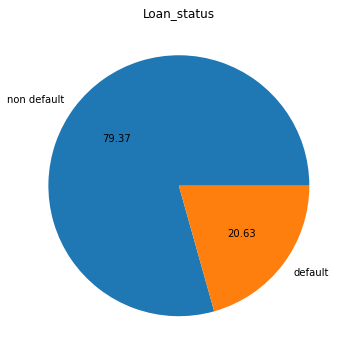

In [117]:
fig,axes=plt.subplots(figsize=(20,6))
x=credit['loan_status'].value_counts()
labels = ['non default','default']
plt.pie(x, labels=labels,autopct='%.2f')
plt.title('Loan_status')
plt.show()

# Observation:
- Here we can see that the non_defaulters occupies more percentage.it means compare to loan default, nondefault is high.

## Bi_variate analysis

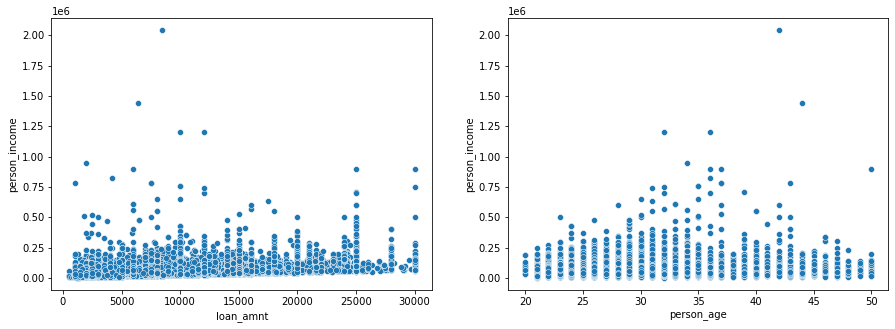

In [121]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=credit['loan_amnt'],y=credit['person_income'],data=credit,ax=axes[0])
sns.scatterplot(x=credit['person_age'],y=credit['person_income'],data=credit,ax=axes[1])
plt.show()

# Observation:
- The person who have income lessthan 250000(0.25) they only look for loans.
- The maximum persons incomes are having the age of 30-40.

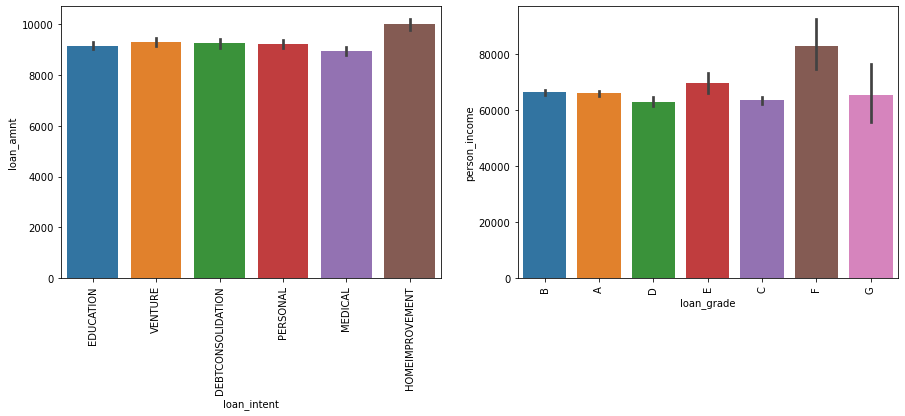

In [123]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=credit['loan_intent'],y=credit['loan_amnt'],data=credit,ax=axes[0])
sns.barplot(x=credit['loan_grade'],y=credit['person_income'],data=credit)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- HOMEIMPROVEMENT Loan_intent get the high loan_amount.
- The person who have F grade those persons having more income.

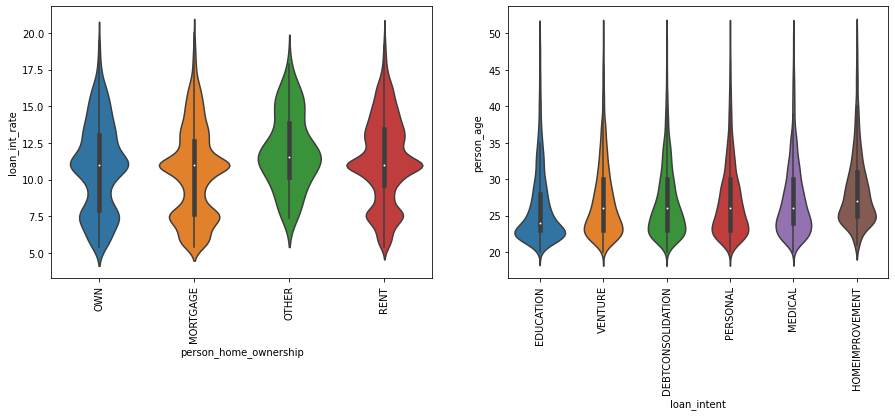

In [125]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x=credit['person_home_ownership'],y=credit['loan_int_rate'],data=credit,ax=axes[0])
sns.violinplot(x=credit['loan_intent'],y=credit['person_age'],data=credit)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- Rent home persons loan_interest_rate high at the range 10.0-12.5.
- Education Loan_intent persons ages are lies between 20-25.

In [75]:
cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


No handles with labels found to put in legend.


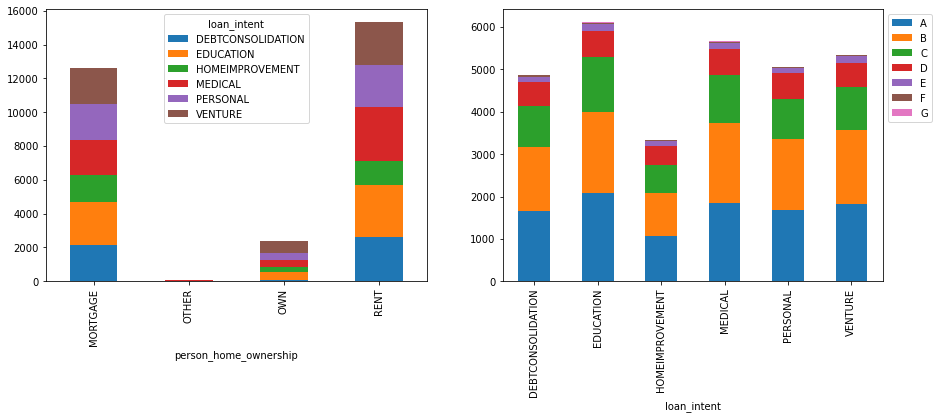

In [130]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
crosstab=pd.crosstab(credit['person_home_ownership'],credit['loan_intent'])
crosstab.plot(kind='bar',stacked=True,ax=axes[0])
plt.legend(bbox_to_anchor=(1,1))
crosstab=pd.crosstab(credit['loan_intent'],credit['loan_grade'])
crosstab.plot(kind='bar',stacked=True,ax=axes[1])
plt.legend(bbox_to_anchor=(1,1))
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

# Observation:
- Rent_home_persons having very high intrest to get the loans compare to the others.
-  In that Rent_home_persons have every type of loans these are
    - 1.Debtconsolidation
    - 2.Education
    - 3.Homeimrovement
    - 4.Medical.
    - 5.Personal
    - 6.Venture

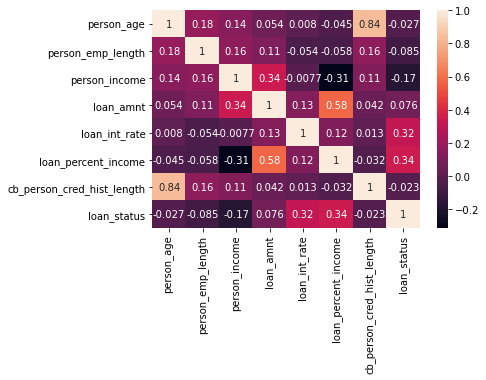

In [88]:
sns.heatmap(credit.corr(),annot=True)
plt.show()

# Observation:
- Person_age and cb_person_cred_hist_length had mostly positive correlation.
- Loan_int_rate and person_Age had very low positive correlation

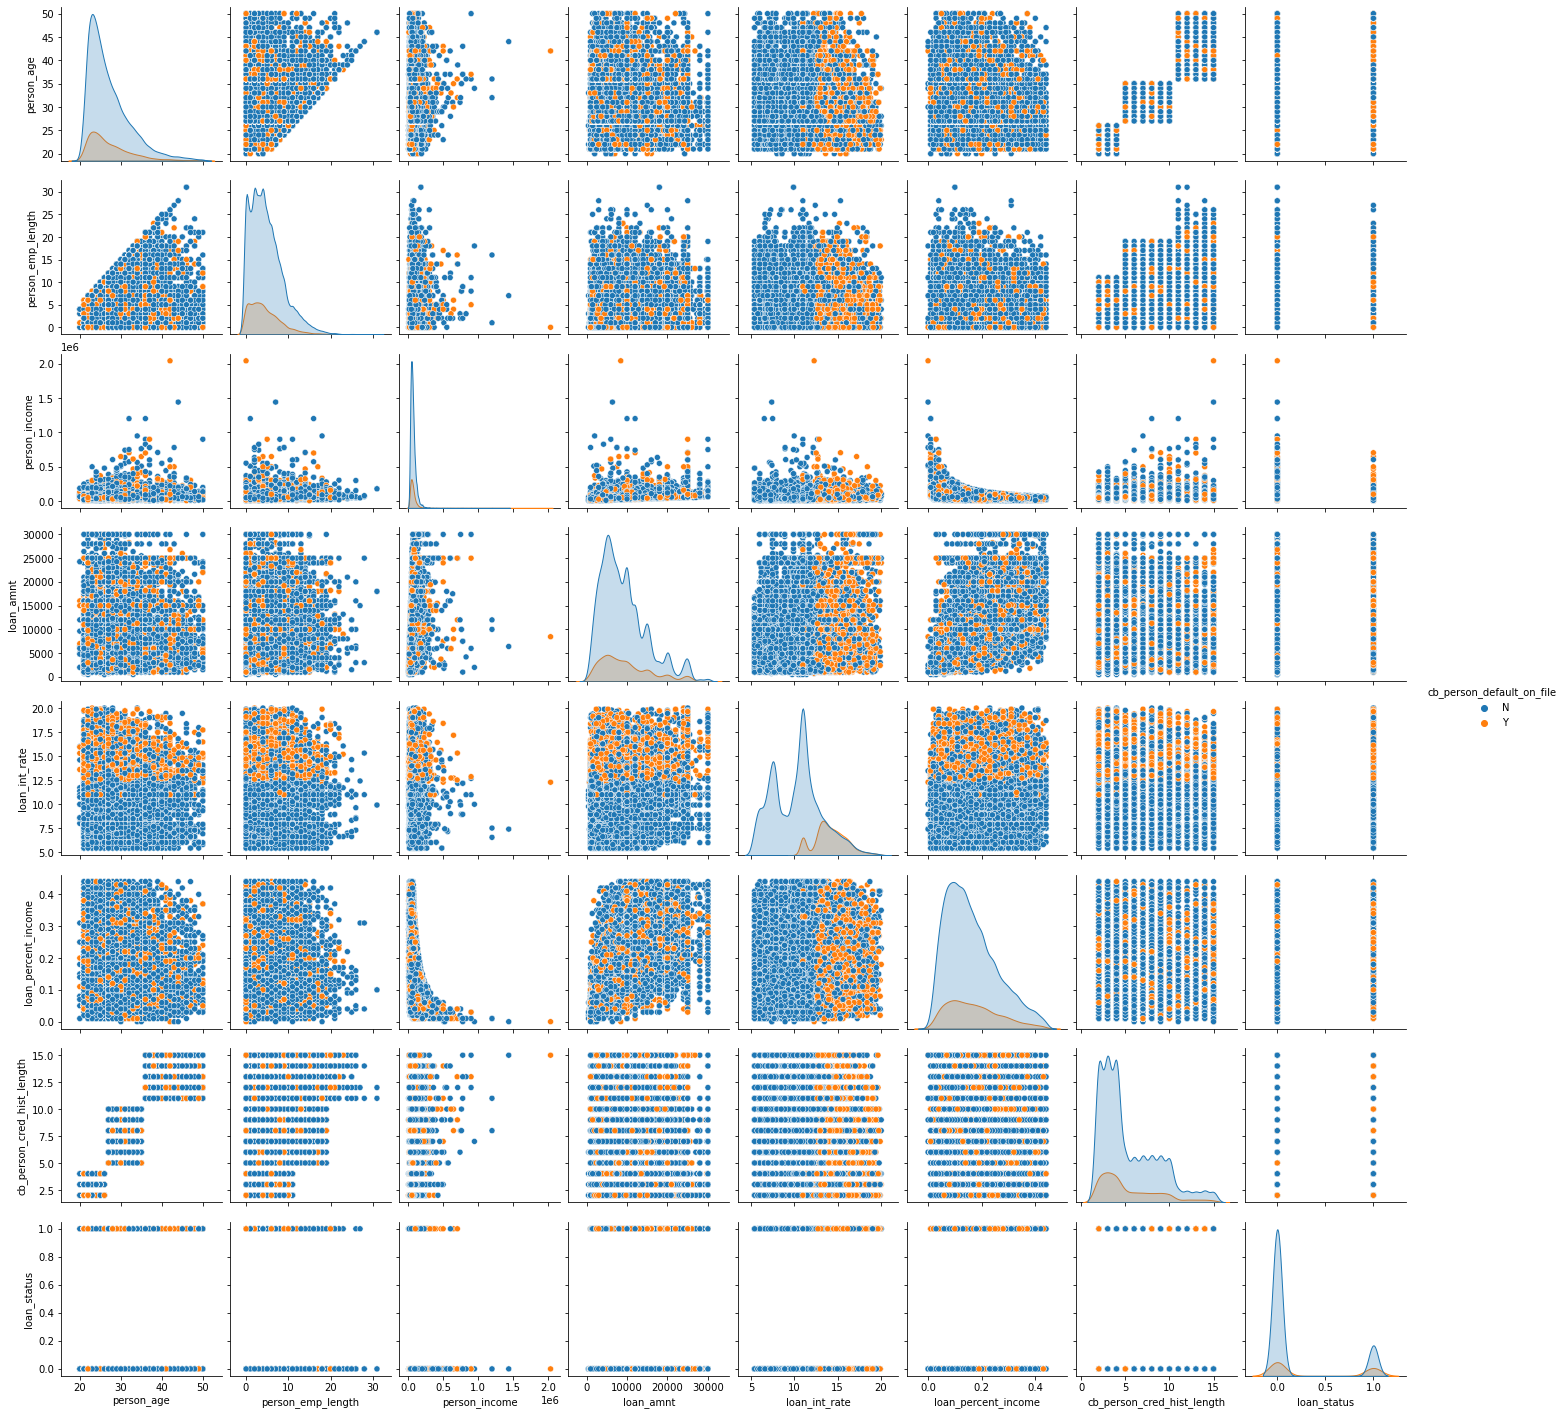

In [89]:
sns.pairplot(data=credit,hue='cb_person_default_on_file')
plt.show()